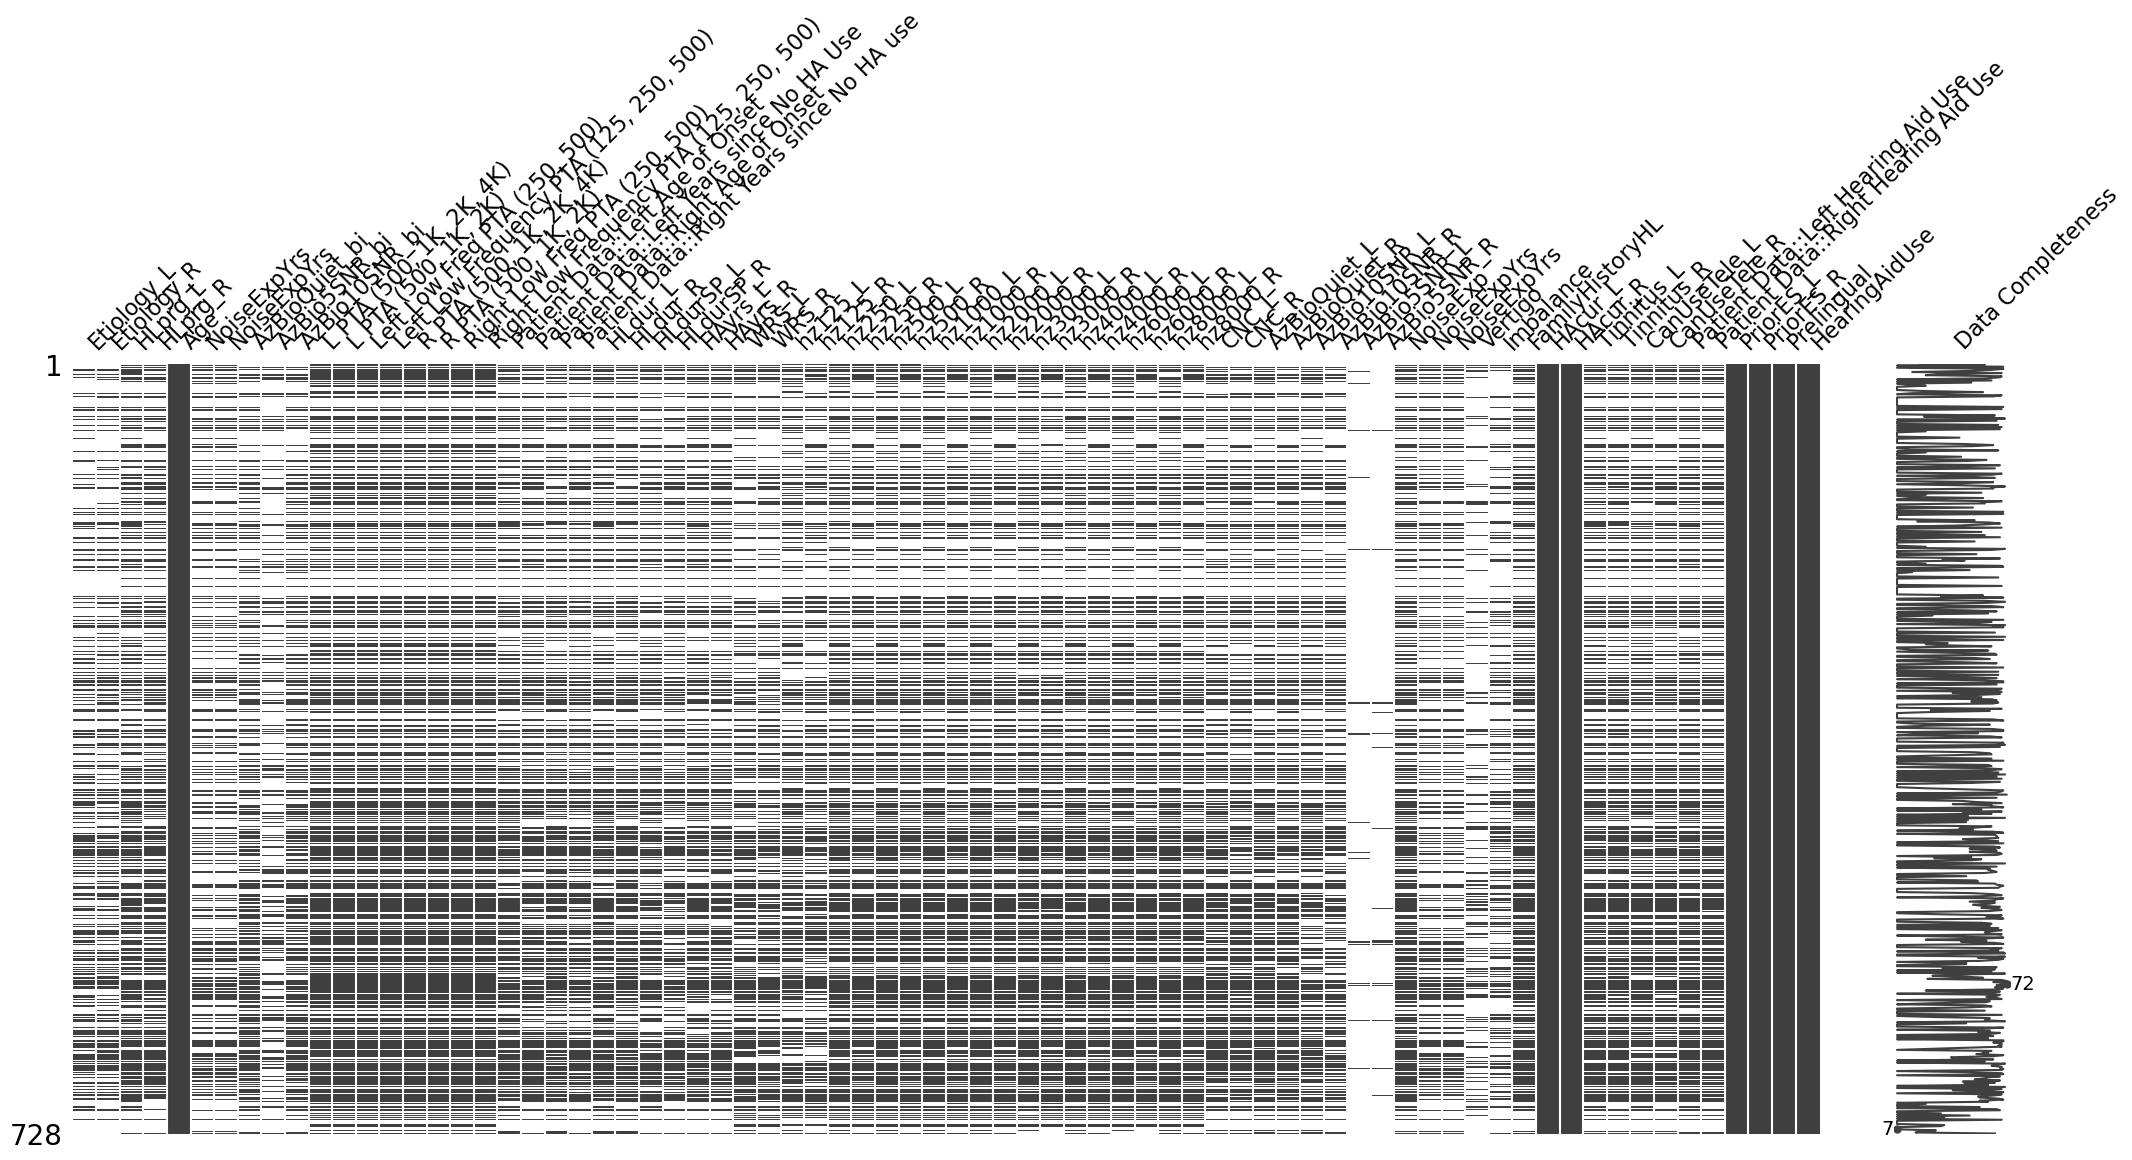

In [174]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
import missingno as msno
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#import dataset
CI_df = pd.read_excel(r"/Users/williambray/Downloads/CI_reg_v1_cleaned.xlsx") 
CI_df_final = prepare_dataset(CI_candidacy_df)
msno.matrix(CI_df_final,labels=True)
plt.show()


In [175]:
CI_df_final.to_excel('Cole_New_Candidacy_clean(4).xlsx')

In [139]:
def prepare_dataset(df):
    df=impute_Age(df)
    df=drop_peds(df)
    df=standardize_col_names(df)
    df=impute_HLdur(df)
    df=impute_HAcur(df)
    df=create_CI_candidate_col(df)
    df=create_CNC_candidacy_col(df)
    df=create_Medicare_candidacy_col(df)
    df=impute_prelingual(df)
    df=select_cols(df)
    df=HearingAidUse(df)
    df=priorES_binary_fill(df)
    df=fix_no_HA_use(df)
    return df

In [97]:
def standardize_col_names(df):
    st_coldict={
     'L_Etiology':'Etiology_L',
     'L_Age_at_Onset':'Patient Data::Left Age of Onset',
     'L_Progression_Hearing_Loss':'HLprg_L',
#     'L_Age_Severe_Hearing_Loss',#HLdurSP_L could impute if need
     'L_Severe_Hearing_Loss_Length':'HLdurSP_L',
     'L_Hearing_Aid_Use':'Patient Data::Left Hearing Aid Use',#HA use calc
     'L_Hearing_Aid_Use_Time':'HAyrs_L',
     'L_Years_Since_No_Hearing_Aid_Use':'Patient Data::Left Years since No HA Use',
     'L_Tinnitus':'Tinnitus_L',
     'L_Previous_Ear_Surgery':'PriorES_L',
     'L_Telephone_Use':'CanUseTele_L',
     'R_Etiology':'Etiology_R',
     'R_Age_at_Onset':'Patient Data::Right Age of Onset',
     'R_Progression_Hearing_Loss':'HLprg_R',
  #   'R_Age_Severe_Hearing_Loss',##HLdurSP_L could impute if need
     'R_Severe_Hearing_Loss_Length':'HLdurSP_R',
     'R_Hearing_Aid_Use':'Patient Data::Right Hearing Aid Use',#HA use calc
     'R_Hearing_Aid_Use_Time':'HAyrs_R',
     'R_Years_Since_No_Hearing_Aid_Use':'Patient Data::Right Years since No HA use',
     'R_Tinnitus':'Tinnitus_R',
     'R_Previous_Ear_Surgery':'PriorES_R',
     'R_Telephone_Use':'CanUseTele_R',
     'Family_Hx_HL':'FamilyHistoryHL',
     'Noise_Exposure':'NoiseExp',
     'Years_of_Noise_Exposure':'NoiseExpYrs',
     'L_Air_125Hz':'hz125_L',
     'L_Air_250Hz':'hz250_L',
     'L_Air_500Hz':'hz500_L',
     'L_Air_750Hz':'hz750_L',
     'L_Air_1000Hz':'hz1000_L',
     'L_Air_1500Hz':'hz1500_L',
     'L_Air_2000Hz':'hz2000_L',
     'L_Air_3000Hz':'hz3000_L',
     'L_Air_4000Hz':'hz4000_L',
     'L_Air_5000Hz':'hz5000_L',
     'L_Air_6000Hz':'hz6000_L',
     'L_Air_8000Hz':'hz8000_L',
     'L_PTA':'L PTA (500, 1K, 2K)',
     'L_PTA4K':'L PTA (500, 1K, 2K, 4K)',
     'L_PTA_Low':'Left Low Freq PTA (250, 500)',
     'L_PTA_Low125':'Left Low Frequency PTA (125, 250, 500)',
     'L_WRS_Percent':'WRS_L',
     'R_Air_125Hz':'hz125_R',
     'R_Air_250Hz':'hz250_R',
     'R_Air_500Hz':'hz500_R',
     'R_Air_750Hz':'hz750_R',
     'R_Air_1000Hz':'hz1000_R',
     'R_Air_1500Hz':'hz1500_R',
     'R_Air_2000Hz':'hz2000_R',
     'R_Air_3000Hz':'hz3000_R',
     'R_Air_4000Hz':'hz4000_R',
     'R_Air_5000Hz':'hz5000_R',
     'R_Air_6000Hz':'hz6000_R',
     'R_Air_8000Hz':'hz8000_R',
     'R_PTA':'R PTA (500, 1K, 2K)',
     'R_PTA4K':'R PTA (500, 1K, 2K, 4K)',
     'R_PTA_Low':'Right Low Freq PTA (250, 500)',
     'R_PTA_Low125':'Right Low Frequency PTA (125, 250, 500)',
     'R_WRS_Percent':'WRS_R',
     'L_CNC_Score':'CNC_L',
     'R_CNC_Score':'CNC_R',
     'L_AzBio_Score':'AzBioQuiet_L',
     'R_AzBio_Score':'AzBioQuiet_R',
     'B_AzBio_Score':'AzBioQuiet_bi',
     'L_AzBio_SNR10_Score':'AzBio10SNR_L',
     'R_AzBio_SNR10_Score':'AzBio10SNR_R',
     'B_AzBio_SNR10_Score':'AzBio10SNR_bi',
     'L_AzBio_SNR5_Score':'AzBio5SNR_L',
     'R_AzBio_SNR5_Score':'AzBio5SNR_R',
     'B_AzBio_SNR5_Score':'AzBio5SNR_bi',
    }
        
    df = df.rename(columns=st_coldict)
    return df

# candidacy

In [126]:
def impute_Age(df):
    df=df.replace('8/21/0948','8/21/1948')
    df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])
    df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
    replace_dict={
        '2049-05-26':'1949-05-26','2045-01-20':'1945-01-20','2047-01-15':'1947-01-15','1920-12-30':'2020-12-30','2002-03-04':'2022-03-04',
        '2051-05-17':'1951-05-17','2032-09-05':'1932-09-05','2048-05-12':'1948-05-12','2035-09-24':'1935-09-24','2043-08-28':'1943-08-28','2022-09-27':np.nan  
    }
    df=df.replace(replace_dict)
    # Ensure both columns are not null before calculating age
    mask = df['Date_of_Surgery'].notnull() & df['Date_of_Birth'].notnull()
    df.loc[mask, 'Age'] = (df.loc[mask, 'Date_of_Surgery'] - df.loc[mask, 'Date_of_Birth']).dt.days // 365
    
    negative_ages = df[df['Age'] < 0]
    if not negative_ages.empty:
        print("Negative age values found:")
        print(negative_ages[['Date_of_Birth', 'Date_of_Surgery', 'Age']])
    
    return df
def impute_prelingual(df):
    df['Prelingual'] = 0  # Default to 0
    df.loc[(df['L_Prelingual_Hearing_Loss'] == 1) | (df['R_Prelingual_Hearing_Loss'] == 1), 'Prelingual'] = 1
    df.loc[(df['L_Prelingual_Hearing_Loss'] == 0) & (df['R_Prelingual_Hearing_Loss'] == 0), 'Prelingual'] = 0
    return df
#     for x in df['Prelingual']:
#         if df['L_Prelingual_Hearing_Loss']==1 or df['R_Prelingual_Hearing_Loss']==1:
#             x=1
#         elif (df['L_Prelingual_Hearing_Loss']==0)|(['R_Prelingual_Hearing_Loss']==0):
#             x=0
 
def HearingAidUse(df):
    df['HearingAidUse'] = 0  # Default to 0
    df.loc[(df['Patient Data::Left Hearing Aid Use'] == 1) | (df['Patient Data::Right Hearing Aid Use'] == 1), 'HearingAidUse'] = 1
    df.loc[(df['Patient Data::Left Hearing Aid Use'] == 0) & (df['Patient Data::Right Hearing Aid Use'] == 0), 'HearingAidUse'] = 0
#     for x in df['HearingAidUse']:
#         if df['Patient Data::Left Hearing Aid Use']==1 or df['Patient Data::Right Hearing Aid Use']==1:
#             x=1
#         elif (df['Patient Data::Left Hearing Aid Use']==0)|(['Patient Data::Right Hearing Aid Use']==0):
#             x=0
    return df

In [99]:
def impute_HLdur(df):
    mask_L = df['Age'].notnull() & df['Patient Data::Left Age of Onset'].notnull()
    df.loc[mask_L, 'HLdur_L'] = df.loc[mask_L, 'Age'] - df.loc[mask_L, 'Patient Data::Left Age of Onset']

    mask_R = df['Age'].notnull() & df['Patient Data::Right Age of Onset'].notnull()
    df.loc[mask_R, 'HLdur_R'] = df.loc[mask_R, 'Age'] - df.loc[mask_R, 'Patient Data::Right Age of Onset']
    
    return df
def impute_HAcur(df):
    for x in df['Patient Data::Left Years since No HA Use']:
        if x==0:
            df['HAcur_L']=1
        else:
            df['HAcur_L']=0
    for x in df['Patient Data::Right Years since No HA use']:
        if x==0:
            df['HAcur_R']=1
        else:
            df['HAcur_R']=0  
    return df
#CI candidate=AZ Bio quiet or +10<60% binaural
def create_CI_candidate_col(df):
    df['CI candidate']= (df['AzBio10SNR_bi']<=60)| (df['AzBioQuiet_bi'] <= 60)
    return df
#CNC candidacy- less than 40% (worst of either ear)
def create_CNC_candidacy_col(df):
    df['CNC candidate']=(df['CNC_L']<=40)|(df['CNC_R']<=40)
    return df
# medicare candidate= over 65 less than 40% (az quiet or +10) binaural
def create_Medicare_candidacy_col(df):
    df['Medicare candidate'] = (((df['AzBio10SNR_bi'] <= 40) | (df['AzBioQuiet_bi'] <= 40)) & (df['Age'] >= 65))
    return df

In [171]:
def select_cols(df):
    cols=[
    'Etiology_L',
    'Etiology_R',
    'HLprg_L',
    'HLprg_R',
    'Age',
    'NoiseExpYrs',
 #   'CNC_bi',#100
    'AzBioQuiet_bi',#100
    'AzBio5SNR_bi',#100
    'AzBio10SNR_bi',
   # 'MOCA',
    'L PTA (500, 1K, 2K, 4K)',#125
    'L PTA (500, 1K, 2K)',#125
    'Left Low Freq PTA (250, 500)',#125
    'Left Low Frequency PTA (125, 250, 500)',#125
    'R PTA (500, 1K, 2K, 4K)',#125
    'R PTA (500, 1K, 2K)',#125
    'Right Low Freq PTA (250, 500)',#125
    'Right Low Frequency PTA (125, 250, 500)',#125
    'Patient Data::Left Age of Onset',#
    'Patient Data::Left Years since No HA Use',#
    'Patient Data::Right Age of Onset',#
    'Patient Data::Right Years since No HA use',
    'HLdur_L',#
    'HLdur_R',#
    'HLdurSP_L',#
    'HLdurSP_R',#
    'HAyrs_L',#  deal with -0.1 value, ask Dr. Shew
    'HAyrs_R',
    'WRS_L',#
    'WRS_R',#
    'hz125_L',#125
    'hz125_R',
    'hz250_L',
    'hz250_R',
    'hz500_L',
    'hz500_R',
    'hz1000_L',
    'hz1000_R',
    'hz2000_L',
    'hz2000_R',
    'hz3000_L',
    'hz3000_R',
    'hz4000_L',
    'hz4000_R',
    'hz6000_L',
    'hz6000_R',
    'hz8000_L',
    'hz8000_R',
    'CNC_L',#100
    'CNC_R',#100
    'AzBioQuiet_L',#100
    'AzBioQuiet_R',#100
    'AzBio10SNR_L',#100
    'AzBio10SNR_R',#100
    'AzBio5SNR_L',#100
    'AzBio5SNR_R',
    'NoiseExp',
    'NoiseExpYrs',
    'Vertigo',
    'Imbalance',
    'FamilyHistoryHL',
    'HAcur_L',
    'HAcur_R',
    'Tinnitus_L',
    'Tinnitus_R',
    'CanUseTele_L',
    'CanUseTele_R',
    'Patient Data::Left Hearing Aid Use',
    'Patient Data::Right Hearing Aid Use',
    'PriorES_L',
    'PriorES_R',
    'Prelingual'
    ]
    blank_col=[
        'HearingAidUse'
    ]
    df=df.reindex(columns=cols+blank_col)

    df=df[cols]
    
    return df

In [101]:
def drop_peds(df):
    df=df[df['Age']>=18]
    return df

In [159]:
CI_df_final['PriorES_L'].describe()

count     728
unique      2
top         0
freq      663
Name: PriorES_L, dtype: int64

In [158]:
def priorES_binary_fill(df):
    replace_dict={'Other':1, 'Cochlear Implant':1,
       'Stapedotomy / Stapedectomy':1, 'Tympanoplasty / Tymp OCR':1,
       'Tympanomastoidectomy':1, 'Osseointegrated Implant':1,
       'Endolymphatic Shunt':1,
       'Osseointegrated Implant\nEndolymphatic Shunt':1,
       'Stapedotomy / Stapedectomy\nStereotactic Radiation':1,
       'Other\nSubtotal Petrosectomy':1, 'Craniotomy for Acoustic Neuroma':1,
       'Stereotactic Radiation':1}
    df['PriorES_L']=df['PriorES_L'].replace(replace_dict)
    df['PriorES_R']=df['PriorES_R'].replace(replace_dict)
    df.loc[df['PriorES_L']!=1,"PriorES_L"]=0
    df.loc[df['PriorES_R']!=1,"PriorES_R"]=0
    return df
    

In [140]:
def fix_no_HA_use(df):
    df['Patient Data::Right Years since No HA use']=df['Patient Data::Right Years since No HA use'].fillna(df['HLdurSP_R'])
    df['Patient Data::Left Years since No HA Use']=df['Patient Data::Left Years since No HA Use'].fillna(df['HLdurSP_R'])
    return df